In [1]:
# IMPORTACIÓN DE LIBRERÍAS
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ASIGNACIÓN DE DATOS A VARIABLE
datos = pd.read_csv(filepath_or_buffer = "/Users/XITLALY/Evaluacion2/comprar_alquilar.csv")

In [3]:
# MOSTRAR LOS DATOS
datos

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [4]:
# MOSTRAMOS NÚMERO, NOMBRE Y TIPO DE DATO DE LAS COLUMNAS DEL DATAFRAME
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [5]:
# OBTENEMOS EL INDICE DE LOS DATOS DEL DATAFRAME Y CREAMOS UNO NUEVO CON ESA ÚNICA COLUMNA Y ASIGNAMOS ESOS DATOS A NUESTRA VARIABLE
Y = datos.index
Y = pd.DataFrame(Y,columns= ['Personas'])
Y

,Personas
0,0
1,1
2,2
3,3
4,4
...,...
197,197
198,198
199,199
200,200


In [6]:
# ASIGNAMOS LOS DEMÁS DATOS RELEVANTES A NUESTRA OTRA VARIABLE
X = datos[['ingresos','gastos_comunes','pago_coche', 'gastos_otros', 'ahorros', 'vivienda']]
print (X)

     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda
0        6000            1000           0           600    50000    400000
1        6745             944         123           429    43240    636897
2        6455            1033          98           795    57463    321779
3        7098            1278          15           254    54506    660933
4        6167             863         223           520    41512    348932
..        ...             ...         ...           ...      ...       ...
197      3831             690         352           488    10723    363120
198      3961            1030         270           475    21880    280421
199      3184             955         276           684    35565    388025
200      3334             867         369           652    19985    376892
201      3988            1157         105           382    11980    257580

[202 rows x 6 columns]


In [7]:
# OBTENEMOS VALORES PROMEDIO
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


ingresos            4958.995050
gastos_comunes       971.584158
pago_coche           211.742574
gastos_otros         515.425743
ahorros            38749.668317
vivienda          373349.638614
estado_civil           1.024752
hijos                  1.232673
trabajo                4.490099
comprar                0.331683
dtype: float64

In [8]:
# OBTENEMOS VARIANZA DE VARIABLES
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


ingresos          2.832026e+06
gastos_comunes    7.404187e+04
pago_coche        1.561019e+04
gastos_otros      2.825864e+04
ahorros           3.015513e+08
vivienda          1.859719e+10
estado_civil      7.008768e-01
hijos             1.870967e+00
trabajo           6.430250e+00
comprar           2.227723e-01
dtype: float64

In [9]:
# ENTRENAMOS MODELO PCA CON ESCALAMIENTO DE DATOS
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# EXTRAEMOS MODELO ENTRENADO DEL PIPELINE
modelo_pca = pca_pipe.named_steps['pca']

In [10]:
# COMVERTIMOS EL ARRAY EN DATAFRAME PARA AÑADIR NOMBRE A LOS EJES.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
PC1,0.549343,0.341460,-0.150491,-0.117465,0.489396,0.441293,-0.153442,-0.140073,-0.161600,0.204091
PC2,0.159098,0.055850,-0.076581,0.005565,0.135533,-0.073277,0.453844,0.524006,0.551721,0.396210
PC3,0.015479,-0.270363,0.169250,0.585070,0.225149,0.495919,0.147870,0.186289,0.071546,-0.444294
PC4,0.116159,0.249112,0.789679,-0.401542,-0.093508,0.124575,0.260397,-0.041123,0.065694,-0.203828
PC5,0.133790,0.525504,0.292144,0.660085,-0.167576,-0.281993,-0.196322,-0.002478,-0.030011,0.194513
PC6,-0.057321,0.585072,-0.470722,-0.039776,-0.315515,0.139044,0.306505,0.079488,-0.008611,-0.460459
PC7,0.060758,-0.109744,-0.044617,0.206281,0.057104,-0.113755,0.712110,-0.581456,-0.210120,0.184877
PC8,-0.062014,0.060982,-0.057275,0.032287,0.031747,0.068922,-0.196652,-0.568478,0.780884,-0.103614
PC9,-0.303171,0.227278,0.024930,-0.038606,0.738158,-0.461003,0.043414,0.039218,-0.028632,-0.304429
PC10,0.733855,-0.243417,-0.080184,-0.015805,-0.076869,-0.457569,-0.025773,0.016795,0.065805,-0.418296


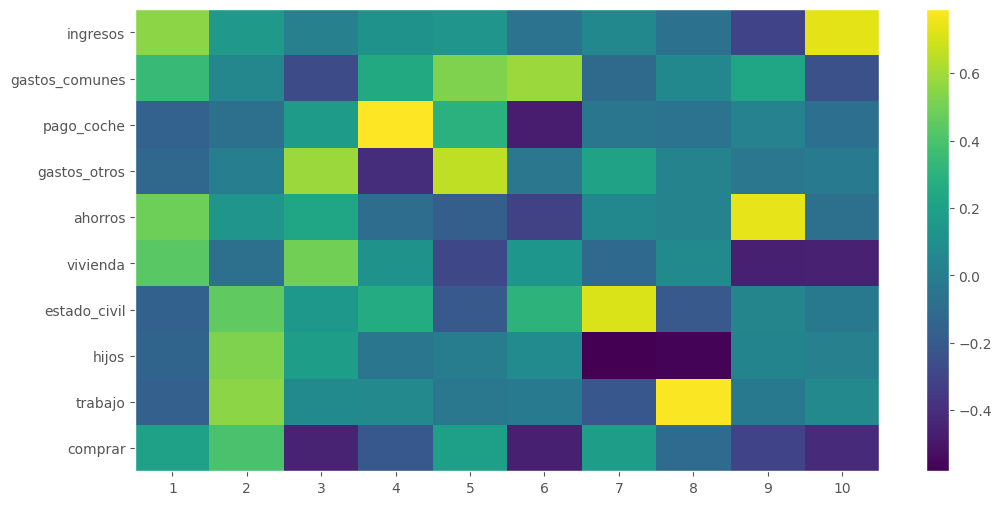

In [11]:
# HEATMAP COMPONENTES
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

[0.27368381 0.23958688 0.10991099 0.10411098 0.09105662 0.07352523
 0.0457761  0.02745036 0.02469122 0.01020781]


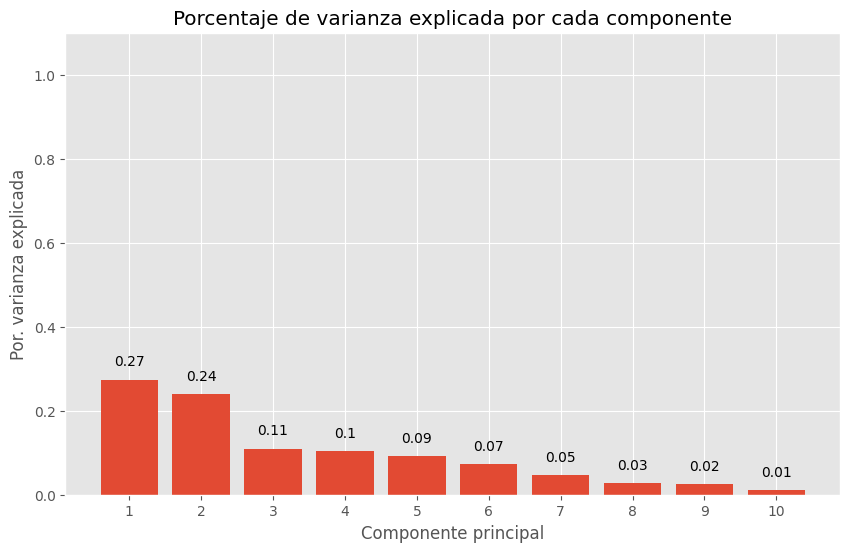

In [12]:
# PORCENTAJE DE VARIANZA EXPLICADO POR CADA COMPONENTE
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

[0.27368381 0.51327069 0.62318168 0.72729266 0.81834928 0.8918745
 0.9376506  0.96510097 0.98979219 1.        ]


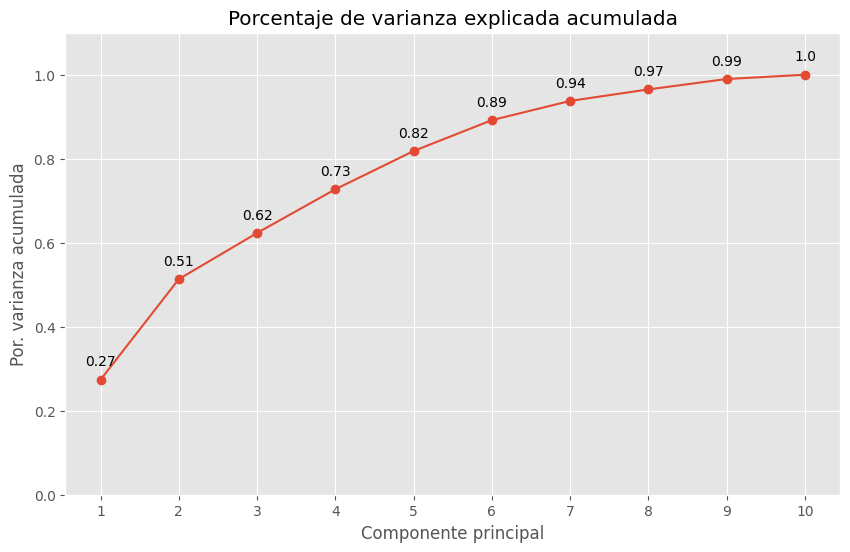

In [13]:
# PORCENTAJE DE VARIANZA ACUMULADA
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [14]:
# PROYECCIÓN DE LAS OBSERVACIONES DE ENTRENAMIENTO UTILIZANDO pca_pipe.transform
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.535449,0.068159,-0.545565,-2.179020,0.355643,-0.348843,-0.510708,-0.878541,-0.272100,-0.199179
1,1.282144,0.823909,1.233645,0.081871,-1.201388,0.835942,-1.234253,-0.097668,-0.798401,0.320819
2,0.779890,2.176401,0.438365,-1.265585,1.003528,-0.270164,1.420402,0.876554,0.238486,0.200750
3,3.150472,-1.288086,-0.290494,-0.190528,-1.351337,1.281028,-0.841160,0.572358,-0.269428,0.046634
4,0.940483,-0.672760,-0.925130,-0.603372,0.491272,-1.490638,0.156435,0.067180,-0.611393,0.071592


In [15]:
datos.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

In [16]:
# NORMALIZAMOS LOS NUEVOS DATOS
scaler=StandardScaler()
scaler.fit(datos)
X_scaled=scaler.transform(datos)

In [17]:
# REINSTANCIAMOS EL OBJETO PCA Y REDUCIMOS LA DIMENSIONALIDAD A 6
pca=PCA(n_components=6)
pca.fit(X_scaled) # OBTENEMOS NUEVOS COMPONENTES PRINCIPALES
X_pca=pca.transform(X_scaled)

In [18]:
# PROYECCIÓN DE LAS OBSERVACIONES DE ENTRENAMIENTO
X_pca = pd.DataFrame(
    X_pca,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
    index   = datos.index
)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.535449,0.068159,-0.545565,-2.179020,0.355643,-0.348843
1,1.282144,0.823909,1.233645,0.081871,-1.201388,0.835942
2,0.779890,2.176401,0.438365,-1.265585,1.003528,-0.270164
3,3.150472,-1.288086,-0.290494,-0.190528,-1.351337,1.281028
4,0.940483,-0.672760,-0.925130,-0.603372,0.491272,-1.490638


In [19]:
print(pca.components_)

[[ 0.54934302  0.34146007 -0.15049138 -0.11746503  0.48939638  0.4412933
  -0.15344247 -0.14007281 -0.16160045  0.20409138]
 [ 0.15909755  0.05584992 -0.07658077  0.00556506  0.13553262 -0.07327675
   0.45384378  0.52400611  0.55172097  0.39620952]
 [ 0.01547889 -0.27036268  0.1692496   0.58506991  0.2251488   0.49591877
   0.1478699   0.18628931  0.07154605 -0.44429353]
 [ 0.11615868  0.2491118   0.78967879 -0.40154183 -0.09350787  0.12457483
   0.2603972  -0.04112256  0.0656939  -0.20382827]
 [ 0.13379015  0.52550381  0.2921437   0.66008455 -0.16757599 -0.28199311
  -0.19632196 -0.00247784 -0.03001071  0.19451342]
 [-0.05732063  0.58507176 -0.47072239 -0.03977609 -0.31551545  0.13904418
   0.30650475  0.07948763 -0.00861148 -0.46045932]]


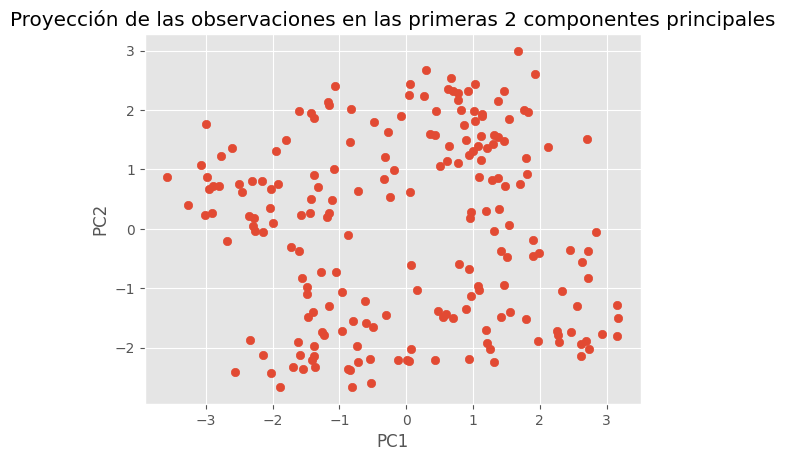

In [20]:
plt.scatter(X_pca['PC1'], X_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección de las observaciones en las primeras 2 componentes principales')
plt.show()

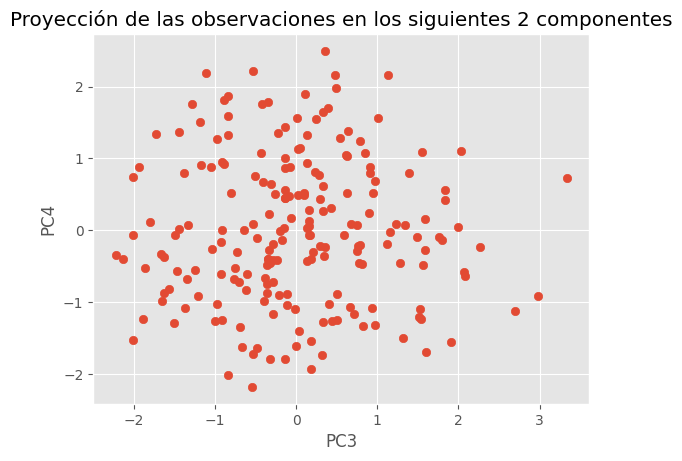

In [21]:
plt.scatter(X_pca['PC3'], X_pca['PC4'])
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Proyección de las observaciones en los siguientes 2 componentes')
plt.show()

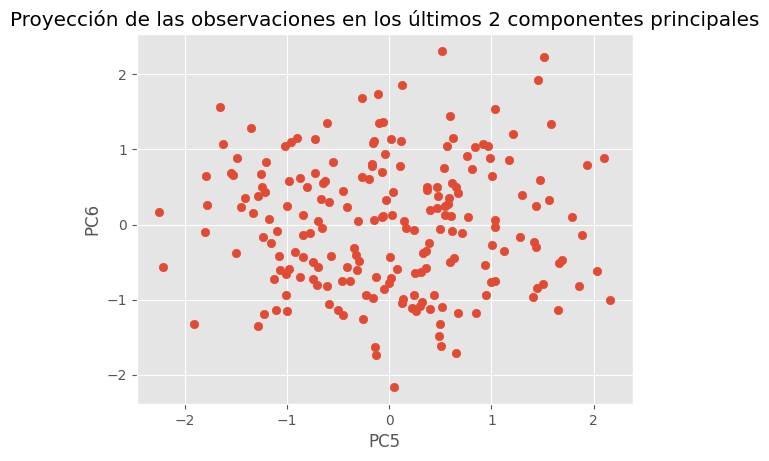

In [22]:
plt.scatter(X_pca['PC5'], X_pca['PC6'])
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.title('Proyección de las observaciones en los últimos 2 componentes principales')
plt.show()